In [30]:
#Term Project Actu

## SETUP FOR GRAPHVIZ : https://www.youtube.com/watch?v=z-AGmGmR6Z8&list=PLPLCR16K6D4i31Zcx0fWOIWBYW5L69M5y&index=2&t=0s
## https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [32]:
df = pd.read_csv("Sweden.csv")
df.head()

,KM,GEOGRAPH,BONUS,MODEL,NOCLAIM,SUMPAYM,CLAIMS
0,1,1,1,1,108,392491,3634.175926
1,1,1,1,2,19,46221,2432.684211
2,1,1,1,3,13,15694,1207.230769
3,1,1,1,4,124,422201,3404.846774
4,1,1,1,5,40,119373,2984.325000


In [33]:
X = df.drop(['NOCLAIM','SUMPAYM','CLAIMS'],axis=1)
y = df['SUMPAYM']
X.head()

,KM,GEOGRAPH,BONUS,MODEL
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [34]:
y_NOCLAIM = df['NOCLAIM']
y_SUMPAYM = df['SUMPAYM']

In [6]:
best_iNOCLAIM = 10
best_jNOCLAIM = 10
best_kNOCLAIM = 1

best_iSUMPAYM = 10
best_jSUMPAYM = 10
best_kSUMPAYM = 1

max_scoreNOCLAIM = 0
max_scoreSUMPAYM = 0

for k in range(1,100):
    ######################## USING SAME TRAIN TEST SPLIT TO BE ABLE TO DIVIDE SUMPAYM WITH CORRESPONDING NOCLAIM AFTERWARDS
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_NOCLAIM, test_size=0.30,random_state=k)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_SUMPAYM, test_size=0.30,random_state=k)
    
    #NO CLAIM OPTIMIZATION OF PARAMETERS
    
    for j in range(5,25):
        for i in range(2,8):
            dtreeNOCLAIM = DecisionTreeRegressor(random_state=0,max_leaf_nodes=i,criterion='mae',min_samples_leaf=(j))
            dtreeNOCLAIM.fit(X_train1,y_train1)
            predictionsNOCLAIM = dtreeNOCLAIM.predict(X_test1)
            scoreNOCLAIM = dtreeNOCLAIM.score(X_test1, y_test1) ## Does NOT need to call dtree.predict I think... dtree.fit is sufficient
            if (scoreNOCLAIM>max_scoreNOCLAIM):
                max_scoreNOCLAIM = scoreNOCLAIM
                best_iNOCLAIM = i
                best_jNOCLAIM = j
                best_kNOCLAIM = k
    j=0
    i=0             
    
    #SUMPAYM OPTIMIZATION OF PARAMETERS
    
    for j in range(5,25):
        for i in range(5,8):
            dtreeSUMPAYM = DecisionTreeRegressor(random_state=0,max_leaf_nodes=i,criterion='mae',min_samples_leaf=(j))
            dtreeSUMPAYM.fit(X_train2,y_train2)
            predictionsSUMPAYM = dtreeSUMPAYM.predict(X_test2)
            scoreSUMPAYM = dtreeSUMPAYM.score(X_test2, y_test2) ## Does NOT need to call dtree.predict I think... dtree.fit is sufficient
            if (scoreSUMPAYM>max_scoreSUMPAYM and k == best_kNOCLAIM): #want to display only if the SAME TRAIN TEST SPLIT
                max_scoreSUMPAYM = scoreSUMPAYM
                best_iSUMPAYM = i
                best_jSUMPAYM = j
                best_kSUMPAYM = k
                print(str(max_scoreNOCLAIM) + " <- NOCLAIM score..."+" i is " + str(best_iNOCLAIM) + " j is "+str(best_jNOCLAIM)+ " k is " +str(best_kNOCLAIM))
                print(str(max_scoreSUMPAYM)+ " <- SUMPAYM score..." +" i is " + str(best_iSUMPAYM) + " j is "+str(best_jSUMPAYM)+ " k is " +str(best_kSUMPAYM))
                

0.3746343573083445 <- NOCLAIM score... i is 7 j is 5 k is 1
0.3136812383994113 <- SUMPAYM score... i is 5 j is 5 k is 1
0.3746343573083445 <- NOCLAIM score... i is 7 j is 5 k is 1
0.31443426044704204 <- SUMPAYM score... i is 6 j is 5 k is 1
0.3746343573083445 <- NOCLAIM score... i is 7 j is 5 k is 1
0.31502349624224224 <- SUMPAYM score... i is 7 j is 5 k is 1
0.6124387962540636 <- NOCLAIM score... i is 7 j is 11 k is 2
0.565823568791854 <- SUMPAYM score... i is 5 j is 11 k is 2
0.6124387962540636 <- NOCLAIM score... i is 7 j is 11 k is 2
0.5672343618450545 <- SUMPAYM score... i is 6 j is 11 k is 2
0.6124387962540636 <- NOCLAIM score... i is 7 j is 11 k is 2
0.5673701799292072 <- SUMPAYM score... i is 7 j is 11 k is 2
0.7223904056131032 <- NOCLAIM score... i is 7 j is 10 k is 3
0.6549515749397764 <- SUMPAYM score... i is 5 j is 5 k is 3
0.7223904056131032 <- NOCLAIM score... i is 7 j is 10 k is 3
0.6822240977797908 <- SUMPAYM score... i is 6 j is 5 k is 3
0.7223904056131032 <- NOCLAIM s

In [35]:
#Applying optimal parameters

best_iNOCLAIM = 7
best_jNOCLAIM = 10
best_kNOCLAIM = 8

best_iSUMPAYM = 5 # DECIDED TO USE i=5 for SUMPAYM since do not lose any accuracy while keeping a smaller, easier to interpret tree*************
best_jSUMPAYM = 10
best_kSUMPAYM = 8

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_NOCLAIM, test_size=0.30,random_state=best_kNOCLAIM)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_SUMPAYM, test_size=0.30,random_state=best_kSUMPAYM)

#NOCLAIM
dtreeNOCLAIM = DecisionTreeRegressor(random_state=0,max_leaf_nodes=best_iNOCLAIM,criterion='mae',min_samples_leaf=(best_jNOCLAIM))
dtreeNOCLAIM.fit(X_train1,y_train1)
predictionsNOCLAIM = dtreeNOCLAIM.predict(X_test1)
scoreNOCLAIM = dtreeNOCLAIM.score(X_test1, y_test1)

#R^2 value = 1-SSE/SSTO 
print(str(scoreNOCLAIM) + " <- NOCLAIM score..."+" i is " + str(best_iNOCLAIM) + " j is "+str(best_jNOCLAIM)+ " k is " +str(best_kNOCLAIM))

#SUMPAYM
dtreeSUMPAYM = DecisionTreeRegressor(random_state=0,max_leaf_nodes=best_iSUMPAYM,criterion='mae',min_samples_leaf=(best_jSUMPAYM))
dtreeSUMPAYM.fit(X_train2,y_train2)
predictionsSUMPAYM = dtreeSUMPAYM.predict(X_test2)
scoreSUMPAYM = dtreeSUMPAYM.score(X_test2, y_test2)

#R^2 value = 1-SSE/SSTO 
print(str(scoreSUMPAYM)+ " <- SUMPAYM score..." +" i is " + str(best_iSUMPAYM) + " j is "+str(best_jSUMPAYM)+ " k is " +str(best_kSUMPAYM))
               
               

0.9001019970796635 <- NOCLAIM score... i is 7 j is 10 k is 8
0.8475643216212755 <- SUMPAYM score... i is 5 j is 10 k is 8


In [36]:
##Visualization

## SETUP FOR GRAPHVIZ : https://www.youtube.com/watch?v=z-AGmGmR6Z8&list=PLPLCR16K6D4i31Zcx0fWOIWBYW5L69M5y&index=2&t=0s

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus 

features = list(df.columns[0:4])
features
  




['KM', 'GEOGRAPH', 'BONUS', 'MODEL']

In [37]:
#NOCLAIM VISUALIZATION
dot_data = StringIO()  
export_graphviz(dtreeNOCLAIM, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [38]:
graph.write_png("RTC_NOCLAIMS.png")

True

In [39]:
#SUMPAYM VISUALIZATION
dot_data = StringIO()  
export_graphviz(dtreeSUMPAYM, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [40]:
graph.write_png("RTC_SUMPAYM.png")

True

In [41]:
#Image(graph.create_jpeg())

In [42]:
compareDF = pd.DataFrame(
    {
    #Actual
    'Number of Claims':y_test1.reset_index()['NOCLAIM'],
    'Sum Payment':y_test2.reset_index()['SUMPAYM'],
    'Average Claims': y_test2.reset_index()['SUMPAYM']/y_test1.reset_index()['NOCLAIM'],
    
    '|'   : '|',
     #Predictions
    'Predicted Number of Claims':pd.Series(predictionsNOCLAIM),
    'Predicted Sum Payment':pd.Series(predictionsSUMPAYM),
    'Predicted Average Claims(PredSum/ActualNoClaims)': pd.Series(predictionsSUMPAYM)/y_test1.reset_index()['NOCLAIM'],
})


compareDF.head()

,Number of Claims,Sum Payment,Average Claims,|,Predicted Number of Claims,Predicted Sum Payment,Predicted Average Claims(PredSum/ActualNoClaims)
0,98,524453,5351.561224,|,111.0,505940.0,5162.653061
1,8,19055,2381.875000,|,4.0,12901.5,1612.687500
2,0,0,NaN,|,4.0,12901.5,inf
3,5,40553,8110.600000,|,4.0,12901.5,2580.300000
4,638,2873487,4503.898119,|,456.0,1911772.0,2996.507837


In [43]:
#NOCLAIM
compareNOCLAIM = compareDF[['Number of Claims','Predicted Number of Claims']]

compareNOCLAIM['Absolute Error'] = abs(compareNOCLAIM['Number of Claims'] - compareNOCLAIM['Predicted Number of Claims'])
compareNOCLAIM.head()

C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Number of Claims,Predicted Number of Claims,Absolute Error
0,98,111.0,13.0
1,8,4.0,4.0
2,0,4.0,4.0
3,5,4.0,1.0
4,638,456.0,182.0


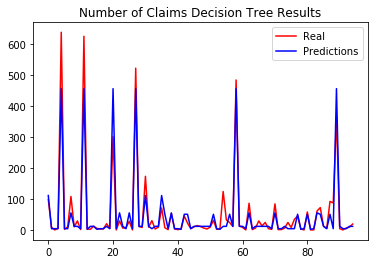

In [44]:
#Plot NOCLAIM
plt.plot(compareNOCLAIM['Number of Claims'],color='red',label='Real')
plt.plot(compareNOCLAIM['Predicted Number of Claims'],color='blue',label='Predictions')
plt.legend()
plt.title('Number of Claims Decision Tree Results')
plt.show()

In [45]:
#SUMPAYM
compareSUMPAYM = compareDF[['Sum Payment','Predicted Sum Payment']]

compareSUMPAYM['Absolute Error'] = abs(compareSUMPAYM['Sum Payment'] - compareSUMPAYM['Predicted Sum Payment'])
compareSUMPAYM.head()


C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Sum Payment,Predicted Sum Payment,Absolute Error
0,524453,505940.0,18513.0
1,19055,12901.5,6153.5
2,0,12901.5,12901.5
3,40553,12901.5,27651.5
4,2873487,1911772.0,961715.0


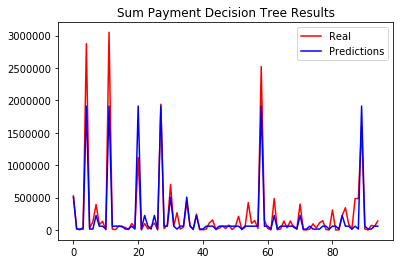

In [46]:
#Plot SUMPAYM
plt.plot(compareSUMPAYM['Sum Payment'],color='red',label='Real')
plt.plot(compareSUMPAYM['Predicted Sum Payment'],color='blue',label='Predictions')
plt.legend()
plt.title('Sum Payment Decision Tree Results')
plt.show()


In [47]:
#AVG
#compareAVG = compareDF[['Average Claims','Predicted Average Claims']]

#compareAVG['Absolute Error'] = abs(compareAVG['Average Claims'] - compareAVG['Predicted Average Claims'])
#compareAVG.head()


In [48]:
#Plot AVG
#plt.plot(compareAVG['Average Claims'],color='red',label='Real')
#plt.plot(compareAVG['Predicted Average Claims'],color='blue',label='Predictions')
#plt.legend()
#plt.title('Average Claims Decision Tree Regression')
#plt.show()


In [49]:
#plt.plot(compareAVG['Absolute Error'],color='red',label = 'Real-Predicted')
#plt.title('Number of claims: Absolute Error of Predictions')
#plt.show()

In [50]:
#EXPORTING TO EXCEL DATA FRAMES

excelSummary = compareDF.to_excel('Summary.xlsx')
excelNOCLAIM = compareNOCLAIM.to_excel('NOCLAIM.xlsx')
excelSUMPAYM= compareSUMPAYM.to_excel('SUMPAYM.xlsx')

In [74]:
#Segmenting data in its classes
X_train2['SUMPAYM'] = y_train2
class1 = X_train2[
    X_train2['MODEL'] <= 8.5][
    X_train2['KM'] <= 3.5][
    X_train2['MODEL'] <= 1.5]


class2 = X_train2[
    X_train2['MODEL'] <= 8.5][
    X_train2['KM'] <= 3.5][
    X_train2['MODEL'] > 1.5]

class3 = X_train2[
    X_train2['MODEL'] <= 8.5][
    X_train2['KM'] >3.5]

class4 = X_train2[
    X_train2['MODEL'] > 8.5][
    X_train2['KM'] <= 3.5]

class5 = X_train2[
    X_train2['MODEL'] > 8.5][
    X_train2['KM'] > 3.5]


C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Humza Wajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match 

In [75]:
#SUMPAYM stuff all the way until you see NOCLAIM

#X_barj values
##################### Describe each of these classes 
####### in report but assign an index j value to each 
# Currently 1 to 5 classes from left to right on tree
X_bar_j =pd.Series([223266,57701.5,12901.5,1911772,505940])
X_bar_j_weights = pd.Series([14,100,80,15,11]) #We base weights off #observations of that class so

# m_hat is a better indicator of the WHOLE data

m_hat = X_bar_j*(X_bar_j_weights/sum(X_bar_j_weights))
m_hat = sum(m_hat)
m_hat


200772.33636363636

In [76]:
avgcl1 = sum(class1['SUMPAYM'])/class1['SUMPAYM'].count()
avgcl2 = sum(class2['SUMPAYM'])/class2['SUMPAYM'].count()
avgcl3 = sum(class3['SUMPAYM'])/class3['SUMPAYM'].count()
avgcl4 = sum(class4['SUMPAYM'])/class4['SUMPAYM'].count()
avgcl5 = sum(class5['SUMPAYM'])/class5['SUMPAYM'].count()


In [81]:
#Setup for s^2 calculation
cl1 = sum((class1['SUMPAYM']-avgcl1)**2)/(class1['SUMPAYM'].count()-1)
cl2 = sum((class2['SUMPAYM']-avgcl2)**2)/(class2['SUMPAYM'].count()-1)
cl3 = sum((class3['SUMPAYM']-avgcl3)**2)/(class3['SUMPAYM'].count()-1)
cl4 = sum((class4['SUMPAYM']-avgcl4)**2)/(class4['SUMPAYM'].count()-1)
cl5 = sum((class5['SUMPAYM']-avgcl5)**2)/(class5['SUMPAYM'].count()-1)

s_2_hat = (1/5)*(cl1+cl2+cl3+cl4+cl5) ##Formula 2.7 Actuarial Journal
s_2_hat



2219061740600.308

In [83]:
#a_hat

#Use formulas 2.7,2.8, etc. from Actuarial journal for a,s^2,etc 
## ORRRR
# Lemma 4.3 formulas... maybe these if using samples (observations in each class) as weights for that class (w_j.)

#Using Lemma 4.3 from notes
a_hat_numerator = 220*(sum(X_bar_j_weights*((X_bar_j-m_hat)**2)) - (5-1)*s_2_hat)
a_hat_denominator =  220**2 - sum(X_bar_j_weights**2)

a_hat = a_hat_numerator/a_hat_denominator
a_hat

286302097017.6461

In [85]:
Z_1 = (a_hat*X_bar_j_weights[0])/(s_2_hat + (a_hat*X_bar_j_weights[0]) )
Z_2 = (a_hat*X_bar_j_weights[1])/(s_2_hat + (a_hat*X_bar_j_weights[1]) )
Z_3 = (a_hat*X_bar_j_weights[2])/(s_2_hat + (a_hat*X_bar_j_weights[2]) )
Z_4 = (a_hat*X_bar_j_weights[3])/(s_2_hat + (a_hat*X_bar_j_weights[3]) )
Z_5 = (a_hat*X_bar_j_weights[4])/(s_2_hat + (a_hat*X_bar_j_weights[4]) )

Z_j = pd.Series([Z_1,Z_2,Z_3,Z_4,Z_5])

In [87]:
#Buhlmann-Straub Credibility application

#Put all the stuff like in Chapter 4 or Assignment 3 tables at the end (Also do it for NOCLAIM)

BS_df = pd.DataFrame(
{
    'Z_j': Z_j
}

)

In [88]:
BS_df

,Z_j
0,0.643655
1,0.928068
2,0.911673
3,0.659318
4,0.586643


In [57]:
#Excel exports of SUMPAYM Data
X_train2.to_excel('X_train_SUMPAYM.xlsx')
class1.to_excel('Class1_SUMPAYM.xlsx')
class2.to_excel('Class2_SUMPAYM.xlsx')
class3.to_excel('Class3_SUMPAYM.xlsx')
class4.to_excel('Class4_SUMPAYM.xlsx')
class5.to_excel('Class5_SUMPAYM.xlsx')
